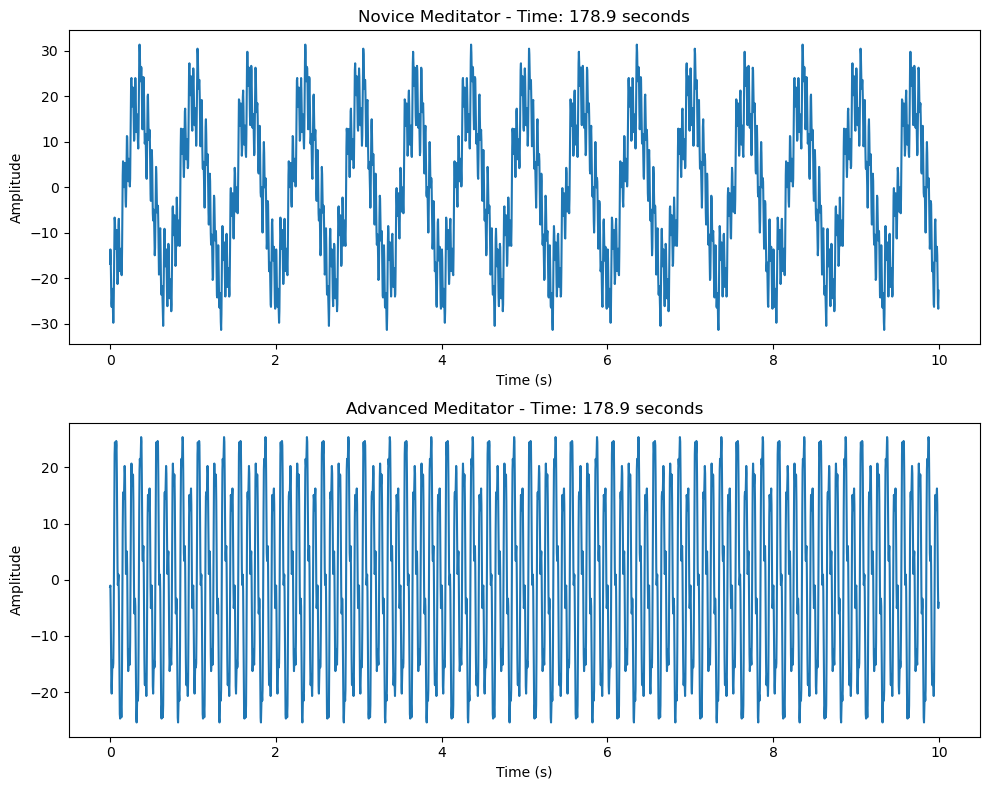

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import display, clear_output

# Parameters
fs = 256  # Sampling rate in Hz
duration = 10  # Duration of the signal in seconds
time_vector = np.arange(0, duration, 1/fs)  # Time vector

# Define frequency bands
delta_freq = 1.5  # Delta band (0.5-4 Hz)
theta_freq = 6  # Theta band (4-8 Hz)
alpha_freq = 10  # Alpha band (8-13 Hz)
beta_freq = 20  # Beta band (13-30 Hz)
gamma_freq = 40  # Gamma band (30-100 Hz)

# Define amplitude ranges for each band (arbitrary units)
# For a novice meditator, we can simulate more high frequency brain waves (like Beta waves)
novice_amplitude = {
    'delta': 20,
    'theta': 1,
    'alpha': 5,
    'beta': 5,
    'gamma': 5
}

# For an advanced meditator, we can simulate more low frequency brain waves (like Alpha and Theta waves)
advanced_amplitude = {
    'delta': 0,
    'theta': 5,
    'alpha': 20,
    'beta': 5,
    'gamma': 5
}

# Generate base EEG signals (sine waves) for each frequency band
waves = {
    'delta': np.sin(2 * np.pi * delta_freq * time_vector),
    'theta': np.sin(2 * np.pi * theta_freq * time_vector),
    'alpha': np.sin(2 * np.pi * alpha_freq * time_vector),
    'beta': np.sin(2 * np.pi * beta_freq * time_vector),
    'gamma': np.sin(2 * np.pi * gamma_freq * time_vector)
}

# Generate EEG data for novice and advanced meditators
eeg_data = {
    'novice': sum(amplitude * waves[band] for band, amplitude in novice_amplitude.items()),
    'advanced': sum(amplitude * waves[band] for band, amplitude in advanced_amplitude.items())
}

# Plot the EEG data
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Initialize the plots
lines = {}
for i, meditator in enumerate(['novice', 'advanced']):
    lines[meditator], = axs[i].plot(time_vector, eeg_data[meditator])
    axs[i].set_title(f'{meditator.capitalize()} Meditator')
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Amplitude')

plt.tight_layout()

# Animation loop for 3 minutes
start_time = time.time()
while time.time() - start_time < 180:  # Run for 3 minutes
    current_time = time.time() - start_time
    shift = int(current_time * fs) % len(time_vector)
    
    for meditator in ['novice', 'advanced']:
        lines[meditator].set_ydata(np.roll(eeg_data[meditator], shift))
    
    for i, meditator in enumerate(['novice', 'advanced']):
        axs[i].set_title(f'{meditator.capitalize()} Meditator - Time: {current_time:.1f} seconds')
    
    clear_output(wait=True)
    display(fig)
    time.sleep(0.1)  # Adjust the speed of the animation

plt.close()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Define frequency bands (in Hz)
delta_freq = (0.5, 4)    # Delta band (0.5-4 Hz)
theta_freq = (4, 8)      # Theta band (4-8 Hz)
alpha_freq = (8, 13)     # Alpha band (8-13 Hz)
beta_freq = (13, 30)     # Beta band (13-30 Hz)
gamma_freq = (30, 100)   # Gamma band (30-100 Hz)


# Define amplitude ranges for each band (arbitrary units)
# For a novice meditator, we can simulate more high frequency brain waves (like Beta waves)
novice_amplitude = {
    'delta': 1,
    'theta': 1,
    'alpha': 1,
    'beta': 20,
    'gamma': 1
}

# For an advanced meditator, we can simulate more low frequency brain waves (like Alpha and Theta waves)
advanced_amplitude = {
    'delta': 20,
    'theta': 20,
    'alpha': 20,
    'beta': 1,
    'gamma': 20
}

# Create a figure and axis
fig, axs = plt.subplots(6, 2, figsize=(10, 15), sharex=True)

# Time variable
t = np.linspace(0, 10, 100)  # Time variable from 0 to 10 seconds

# Initialize lines for each frequency band
lines = {}
for i, band in enumerate(['delta', 'theta', 'alpha', 'beta', 'gamma']):
    lines[band] = {
        'novice': axs[i, 0].plot(t, np.zeros_like(t), label=f'Novice {band.capitalize()}')[0],
        'advanced': axs[i, 1].plot(t, np.zeros_like(t), label=f'Advanced {band.capitalize()}')[0]
    }

# Initialize lines for the combined signals
lines['combined'] = {
    'novice': axs[5, 0].plot(t, np.zeros_like(t), label='Novice Combined')[0],
    'advanced': axs[5, 1].plot(t, np.zeros_like(t), label='Advanced Combined')[0]
}

# Set common properties for all subplots
for ax in axs.flatten():
    ax.set_xlim(0, 10)
    ax.set_ylim(-50, 50)  # Adjust ylim according to your EEG signal range
    ax.legend()

# Update function for the animation
def update(frame):
    # Generate EEG-like signals for each frequency band
    combined_wave_novice = np.zeros_like(t)
    combined_wave_advanced = np.zeros_like(t)
    for band, freq in zip(['delta', 'theta', 'alpha', 'beta', 'gamma'], [delta_freq, theta_freq, alpha_freq, beta_freq, gamma_freq]):
        wave_novice = novice_amplitude[band] * np.sin(2 * np.pi * np.random.uniform(*freq) * t + frame / 10.0)
        wave_advanced = advanced_amplitude[band] * np.sin(2 * np.pi * np.random.uniform(*freq) * t + frame / 10.0)

        # Update y data of the plots
        lines[band]['novice'].set_ydata(wave_novice)
        lines[band]['advanced'].set_ydata(wave_advanced)

        # Add the waves to the combined signals
        combined_wave_novice += wave_novice
        combined_wave_advanced += wave_advanced

    # Update y data of the combined signals
    lines['combined']['novice'].set_ydata(combined_wave_novice)
    lines['combined']['advanced'].set_ydata(combined_wave_advanced)

# Animation
frames = np.arange(0, 100, 1)  # Frames for animation (100 frames)
for frame in frames:
    update(frame)
    for ax in axs.flatten():
        ax.set_title(f'Time: {frame/10:.1f} seconds')  # Update title with current time
    clear_output(wait=True)
    display(fig)
    time.sleep(0.1)  # Adjust the speed of the animation by changing the sleep time

plt.close()


In [ ]:
import socket
import json

# Define the IP and port to listen on
UDP_IP = "127.0.0.1"
UDP_PORT = 12345

# Create a UDP socket
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
sock.bind((UDP_IP, UDP_PORT))

print(f"Listening for UDP packets on {UDP_IP}:{UDP_PORT}...")

# Function to receive and process data
def receive_udp_packets():
    while True:
        try:
            # Receive data from the socket
            data, addr = sock.recvfrom(1024)  # buffer size is 1024 bytes

            # Convert received data from bytes to string
            data_str = data.decode('utf-8')

            # Parse the JSON data
            json_data = json.loads(data_str)
            print("Received JSON data:", json_data)

        except json.JSONDecodeError as e:
            print(f"Error decoding JSON data: {e}")
        except Exception as e:
            print(f"Error processing data: {e}")
            break  # Break the loop if there's an error

# Run the function to start receiving packets
receive_udp_packets()


In [ ]:
import socket
import json
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define the IP and port to listen on
UDP_IP = "127.0.0.1"
UDP_PORT = 12345

# Create a UDP socket
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
sock.bind((UDP_IP, UDP_PORT))

print(f"Listening for UDP packets on {UDP_IP}:{UDP_PORT}...")

# Initialize lists to hold the data
focus_values = []

# Set up the plot
fig, ax = plt.subplots()
line, = ax.plot([], [], label='Focus Value')
plt.title('Focus Values')
plt.xlabel('Time')
plt.ylabel('Focus State')
plt.ylim(-0.5, 1.5)  # Set y-axis limits to show 0 and 1 clearly
plt.yticks([0, 1], ['Concentrating', 'Not Concentrating'])
plt.legend(loc='upper right')
plt.grid(True)

# Function to initialize the plot
def init():
    ax.set_xlim(0, 100)
    line.set_data([], [])
    return line,

# Function to update the plot
def update(frame):
    try:
        # Receive data from the socket
        data, addr = sock.recvfrom(1024)  # buffer size is 1024 bytes

        # Convert received data from bytes to string
        data_str = data.decode('utf-8')

        # Parse the JSON data
        json_data = json.loads(data_str)
        focus_value = json_data.get('data')

        # Append the focus value to the list
        focus_values.append(focus_value)
        if len(focus_values) > 100:  # Limit the list to the last 100 values
            focus_values.pop(0)

        # Debug print to check the received focus values
        print("Received focus value:", focus_value)

        # Update the plot
        line.set_data(range(len(focus_values)), focus_values)
        ax.set_xlim(0, len(focus_values))

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON data: {e}")
    except Exception as e:
        print(f"Error processing data: {e}")

    return line,

# Start the animation
ani = animation.FuncAnimation(fig, update, init_func=init, blit=True, interval=100)

# Show the plot
plt.show()


In [ ]:
import socket
import json
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define the IP and port to listen on
UDP_IP = "127.0.0.1"
UDP_PORT = 12345

# Create a UDP socket
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
sock.bind((UDP_IP, UDP_PORT))

print(f"Listening for UDP packets on {UDP_IP}:{UDP_PORT}...")

# Initialize lists to hold the data
focus_values = []

# Set up the plot
fig, ax = plt.subplots()
line, = ax.plot([], [], label='Focus Value')
plt.title('Focus Values')
plt.xlabel('Time')
plt.ylabel('Focus State')
plt.ylim(-0.5, 1.5)  # Set y-axis limits to show 0 and 1 clearly
plt.yticks([0, 1], ['Concentrating', 'Not Concentrating'])
plt.legend(loc='upper right')
plt.grid(True)

# Function to initialize the plot
def init():
    ax.set_xlim(0, 100)
    line.set_data([], [])
    return line,

# Function to update the plot
def update(frame):
    try:
        # Receive data from the socket
        data, addr = sock.recvfrom(1024)  # buffer size is 1024 bytes

        # Convert received data from bytes to string
        data_str = data.decode('utf-8')

        # Parse the JSON data
        json_data = json.loads(data_str)
        focus_value = json_data.get('data')

        # Append the focus value to the list
        focus_values.append(focus_value)
        if len(focus_values) > 100:  # Limit the list to the last 100 values
            focus_values.pop(0)

        # Debug print to check the received focus values
        print("Received focus value:", focus_value)

        # Update the plot
        line.set_data(range(len(focus_values)), focus_values)
        ax.set_xlim(0, len(focus_values))

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON data: {e}")
    except Exception as e:
        print(f"Error processing data: {e}")

    return line,

# Start the animation
ani = animation.FuncAnimation(fig, update, init_func=init, blit=True, interval=100, cache_frame_data=False)

# Show the plot
plt.show()
